# ДЗ #2. Задача регрессии. Линейная регрессия <a id="0"></a>

### Использованный датасет: https://www.kaggle.com/chirag9073/airbnb-analysis-visualization-and-prediction

* [Загрузка и подготовка данных](#1)
* [Базовые статистики датасета](#2)
* [Визуализация данных](#3)
* [Предобработка данных](#4)
* [Создание сетов для ML](#5)
* [Регрессия](#6)

In [1]:
# Импорт основных библиотек
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Загрузка и подготовка данных [(Наверх)](#0) <a id="1"></a>

### Описание признаков:

- **id** - listing ID
- **name** - name of the listing
- **host_id** - host ID
- **host_name** - name of the host
- **neighbourhood_group** - location
- **neighbourhood** - area
- **latitude** - latitude coordinates
- **longitude** - longitude coordinates
- **room_type** - listing space type
- **price** - price in dollars
- **minimum_nights** - amount of nights minimum
- **number_of_reviews** - number of reviews
- **last_review** - latest review
- **reviews_per_month** - number of reviews per month
- **calculated_host_listings_count** - amount of listing per host
- **availability_365** - number of days when listing is available for booking

In [2]:
filename = 'input/AB_NYC_2019.csv'

if not os.path.exists(filename):
    raise SystemExit('Файл не найден!')
else:
    df = pd.read_csv(filename)

# Проверим корректно ли загружен CSV
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Удалим ненужные категории
df.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis=1, inplace=True)
df.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [4]:
# Проверим на дубликаты и удалим если есть
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [5]:
# Проверим на наличие пустых данных
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Обработаем NaN
df.fillna({'reviews_per_month':0}, inplace=True)
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Базовые статистики датасета [(Наверх)](#0) <a id="2"></a>

In [7]:
# Узнаем размер датасета
df.shape

(48895, 11)

In [8]:
# Узнаем свойства датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.5+ MB


In [9]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Предобработка данных [(Наверх)](#0) <a id="4"></a>

In [10]:
# Закодируем категориальные переменные

neighbourhood_group_1hot = pd.get_dummies(df['neighbourhood_group'])
df = pd.concat([df,neighbourhood_group_1hot], axis=1)

In [11]:
# Центром Нью-Йорка принято считать Columbus Circle (Latitude: 40.7680299; Longitude: -73.9823708). 
# Добавим колонку с Евклидовым расстоянием от центра до каждой квартиры

from scipy.spatial.distance import euclidean

center_ny = (40.7680299, -73.9823708)      #https://www.coordinatesfinder.com/coordinates/161775-columbus-circle

def euclid_calc(row):
    flat_coord = (row['latitude'], row['longitude'])
    return euclidean(center_ny, flat_coord)


df['center_distance'] = df.apply(euclid_calc, axis=1)

## Визуализация данных [(Наверх)](#0) <a id="3"></a>

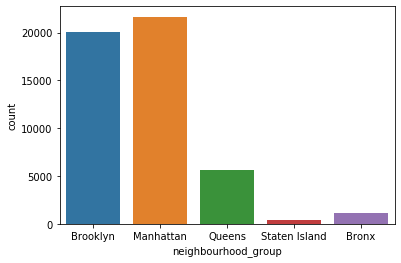

In [12]:
# Построим гистограмму обобщения по 'neighbourhood_group'
sns.countplot(df['neighbourhood_group']);

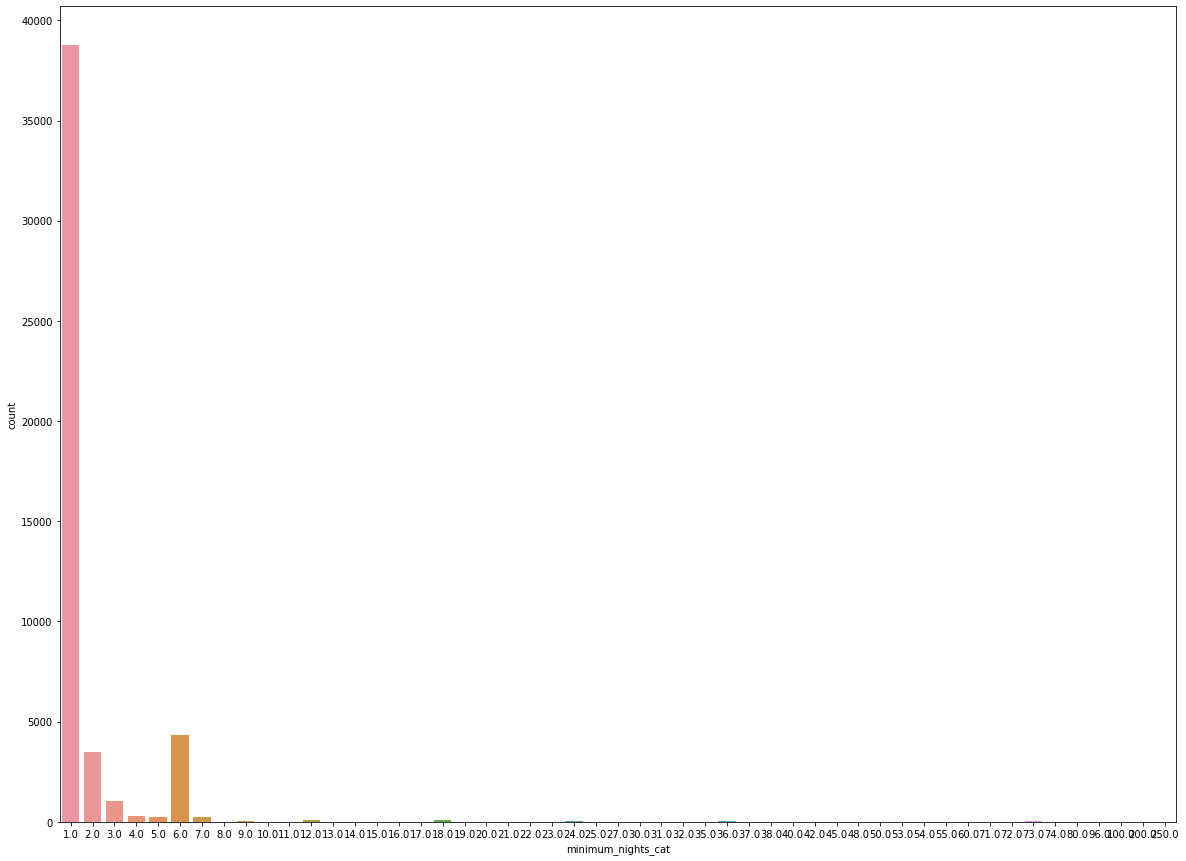

In [13]:
# Разобъём на группы 'minimum_nights' кратностью 5, построим гистограмму

df['minimum_nights_cat'] = np.ceil(df['minimum_nights']/5)
plt.figure(figsize=(20,15))
sns.countplot(df["minimum_nights_cat"]);

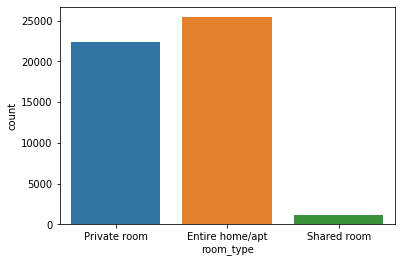

In [14]:
# Построим гистограмму обобщения по 'room_type'
sns.countplot(df['room_type']);

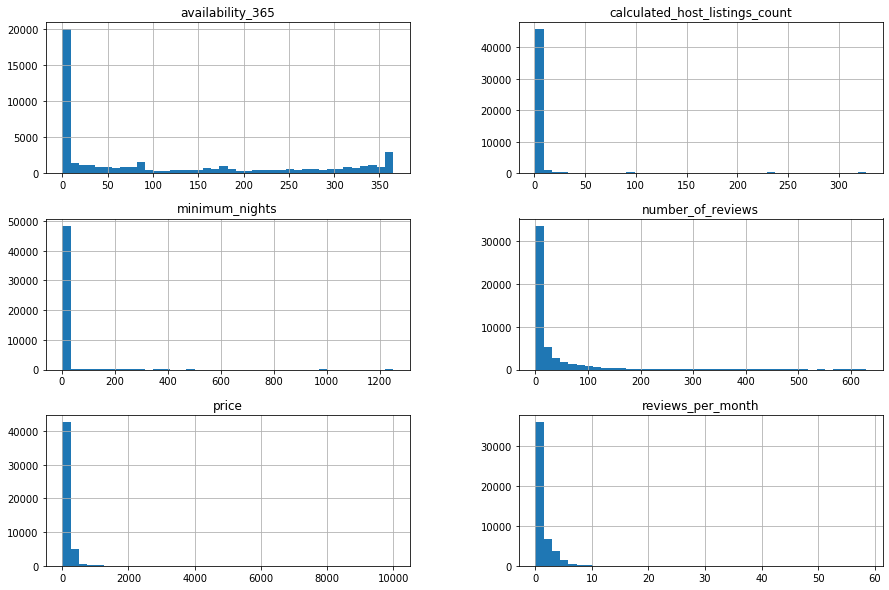

In [15]:
# Построим гистограммы по остальным признакам
df[['price', 'minimum_nights', 'number_of_reviews', 
    'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].hist(bins=40, figsize=(15,10));

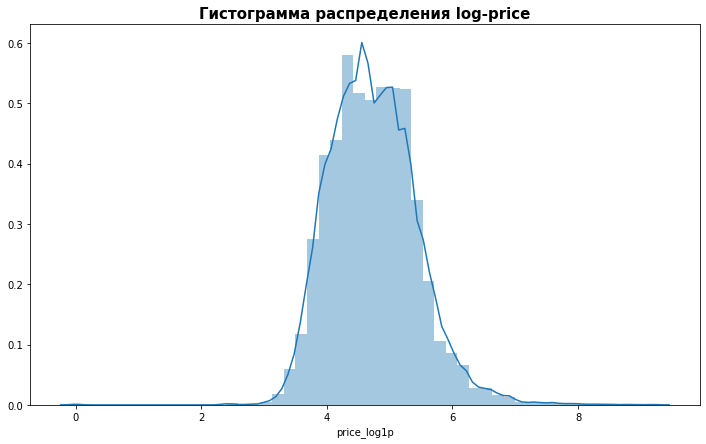

In [16]:
# Заметим что виден явное смещение на графике 'price'. Это может отразиться на дальнейшем анализе. 
# Добавим к данным признак log(1 + price). Построим график

df['price_log1p'] = np.log1p(df['price'])

plt.figure(figsize=(12,7))
sns.distplot(df['price_log1p'])
plt.title("Гистограмма распределения log-price",size=15, weight='bold');

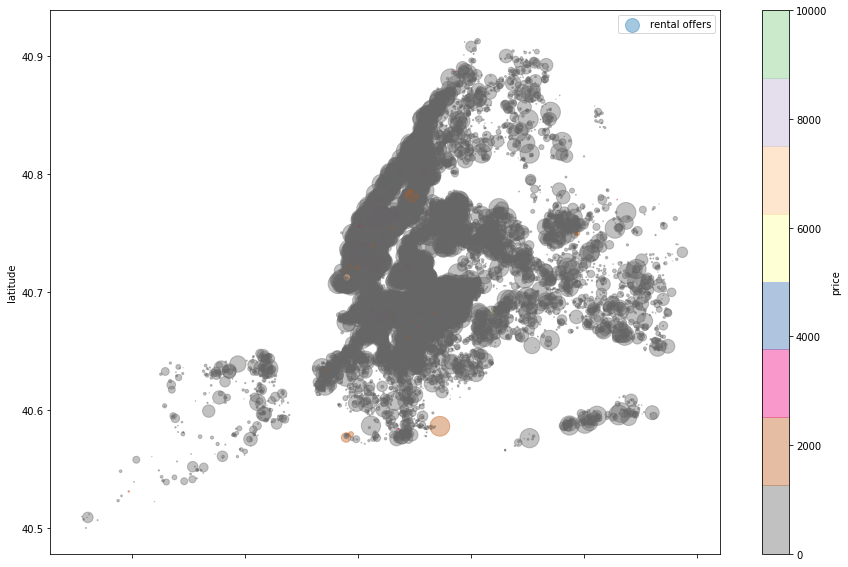

In [17]:
# Построим взаимосвязь 'neighbourhood' и 'price', используя "longitude" и "latitude"

df.plot(kind='scatter', x='longitude', y='latitude',
        alpha=0.4 , s=df[['neighbourhood', 'price']].groupby('neighbourhood').count()/10,
        label='rental offers', figsize=(15, 10), c='price', cmap=plt.get_cmap('Accent_r'), colorbar=True)
plt.legend();

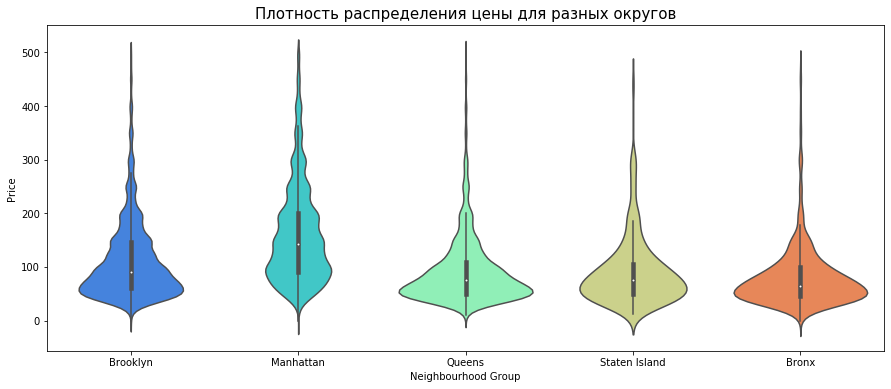

In [18]:
# Построим Violin для 'neighbourhood_group' и 'price'

plt.figure(figsize=(15,6))
sns.violinplot(data=df[df.price <500], x='neighbourhood_group', y='price', palette='rainbow')
plt.title('Плотность распределения цены для разных округов', fontsize=15)
plt.xlabel('Neighbourhood Group')
plt.ylabel("Price");

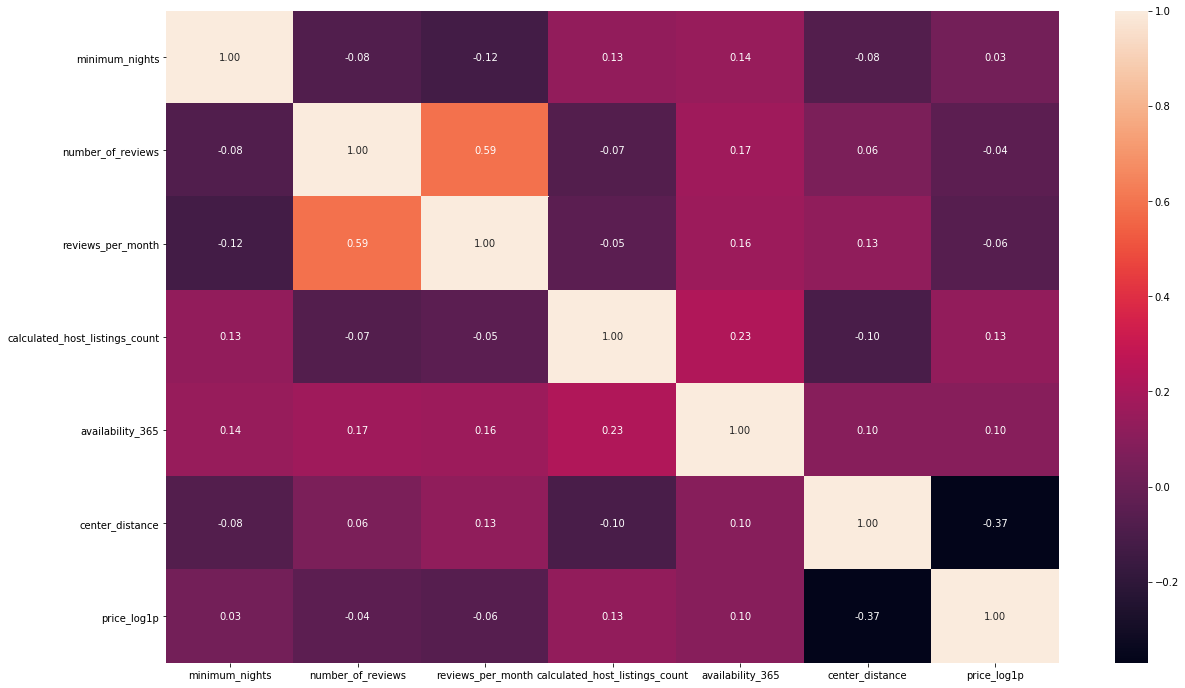

In [19]:
# Рассчитаем корреляции между признаками
corr = df[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 
          'availability_365', 'center_distance', 'price_log1p']].corr(method='pearson')

# Выведем тепловую карту для корреляций
plt.figure(figsize=(20,12));
sns.heatmap(corr, annot=True, fmt='.2f');

## Создание сетов для ML [(Наверх)](#0) <a id="5"></a>

In [20]:
# Удалим ненужные признаки
df.drop(['latitude', 'longitude', 'price', 'neighbourhood_group', 'neighbourhood', 'room_type', 
         'minimum_nights_cat'], axis=1, inplace=True)

In [21]:
from sklearn.model_selection import train_test_split

# Разобъем на X, y сеты
set_x, set_y = df.iloc[:,:-1], df.iloc[:,-1]

# Прошкалируем непрерывные переменные
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
set_x = scaler.fit_transform(set_x)

# Сформируем выборки обучающих и тестовых данных (70:30)
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(set_x, set_y, test_size=0.3,random_state=42)

## Регрессия [(Наверх)](#0) <a id="6"></a>

In [22]:
# Импорт библиотек для регрессии
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [23]:
output = {}

### Linear Regression

In [24]:
# Напишем процедуру для выбора оптимального набора параметров, используя поиск по сетке (GridSearchCV)

def grid_cv(set_X, set_y, estimator, parameters):
    gcv = GridSearchCV(estimator=estimator, param_grid=parameters,
                       scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    gcv.fit(set_X, set_y)
    
    return dict(best_parameters=gcv.best_params_, best_score=gcv.best_score_)

In [25]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}

lr = LinearRegression(grid_cv(set_x, set_y, LinearRegression(), parameters)['best_parameters'])
lr.fit(X_train_set, y_train_set)

output['Linear Regression'] = lr.predict(X_test_set)

### RidgeCV

In [26]:
rcv = RidgeCV(alphas=[1.0,0.1,0.01,0.001,0.0001], cv=5)
rcv.fit(X_train_set, y_train_set)

output['RidgeCV'] = rcv.predict(X_test_set)

### LassoCV

In [27]:
lcv = LassoCV(normalize=False, cv=5)
lcv.fit(X_train_set, y_train_set)
output['LassoCV'] = lcv.predict(X_test_set)

### ElasticNetCV

In [28]:
encv = ElasticNetCV(normalize=False, cv=5)
encv.fit(X_train_set, y_train_set) 
output['ElasticNetCV'] = encv.predict(X_test_set)

### Результат

In [29]:
for key, value in output.items():
    print(key)
    print(f'MAE: {mean_absolute_error(y_test_set, value)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test_set, value))}', end='\n\n') 

Linear Regression
MAE: 0.4862376142453726
RMSE: 0.6230183679418164

RidgeCV
MAE: 0.48630078613843336
RMSE: 0.6230117920462881

LassoCV
MAE: 0.4863057766454228
RMSE: 0.6230095797484695

ElasticNetCV
MAE: 0.4863054644063467
RMSE: 0.6230084760576576

